In [148]:
from keras.datasets import cifar10

In [149]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [150]:
# let's check shape of the data
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

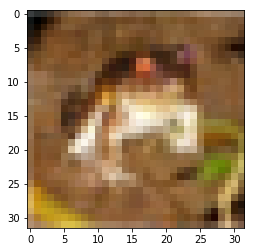

In [152]:
plt.imshow(X_train[0])

In [153]:
# check ma xvalue
X_train.max()

255

In [154]:
# let's scale the data
X_train = X_train/255
X_test = X_test/255

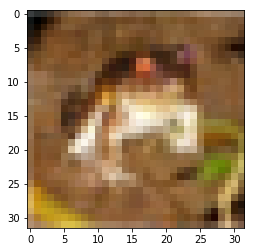

In [155]:
plt.imshow(X_train[0])

In [156]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [157]:
# lets chekc the number of labels
print(y_train.min())
print(y_train.max())
print(y_test.min())
print(y_test.max())

0
9
0
9


In [158]:
from keras.utils import to_categorical

In [159]:
# let's convert the categorical labels using one hot encoding
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [160]:
'''
What CIFAR-10 categories mean:
0 - airplane
1 - automobile
2 - bird
3 - cat
4 - deer
5 - dog
6 - frog
7 - horse
8 - ship
9 - truck
'''

'\nWhat CIFAR-10 categories mean:\n0 - airplane\n1 - automobile\n2 - bird\n3 - cat\n4 - deer\n5 - dog\n6 - frog\n7 - horse\n8 - ship\n9 - truck\n'

In [161]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [162]:
model = Sequential()

# convolution layer 1,2
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))

# pooling layer 1
model.add(MaxPool2D(pool_size=(2, 2)))

# convolution layer 3,4
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))

# pooling layer 2
model.add(MaxPool2D(pool_size=(2, 2)))

# flatten
model.add(Flatten())

# Dense layer 1
model.add(Dense(512, activation='relu'))

# Dropout layer 1
model.add(Dropout(rate = 0.3))

# output layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [163]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 64)        32832     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 64)          65600     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
__________

In [164]:
model.fit(X_train,y_cat_train,verbose = 1, epochs = 10)

Epoch 1/10
50000/50000 [==============================] - 162s 3ms/step - loss: 1.6084 - acc: 0.4196
Epoch 2/10
50000/50000 [==============================] - 156s 3ms/step - loss: 1.2091 - acc: 0.5787 1s - loss: 1.2095 -
Epoch 3/10
50000/50000 [==============================] - 158s 3ms/step - loss: 1.1020 - acc: 0.6252
Epoch 4/10
50000/50000 [==============================] - 159s 3ms/step - loss: 1.0772 - acc: 0.6407
Epoch 5/10
50000/50000 [==============================] - 157s 3ms/step - loss: 1.0705 - acc: 0.6473
Epoch 6/10
50000/50000 [==============================] - 160s 3ms/step - loss: 1.0548 - acc: 0.6549 1s - loss: 1.0541 - 
Epoch 7/10
50000/50000 [==============================] - 158s 3ms/step - loss: 1.0632 - acc: 0.6559
Epoch 8/10
50000/50000 [==============================] - 163s 3ms/step - loss: 1.0696 - acc: 0.6543
Epoch 9/10
50000/50000 [==============================] - 218s 4ms/step - loss: 1.1106 - acc: 0.6491
Epoch 10/10
50000/50000 [=========================

In [166]:
model.evaluate(X_test,y_cat_test)

10000/10000 [==============================] - 14s 1ms/step


[1.1349560777664185, 0.6467]

In [167]:
from sklearn.metrics import classification_report

In [168]:
predictions = model.predict_classes(X_test)

In [169]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.61      0.68      1000
          1       0.83      0.85      0.84      1000
          2       0.91      0.21      0.34      1000
          3       0.62      0.20      0.30      1000
          4       0.52      0.68      0.59      1000
          5       0.46      0.72      0.56      1000
          6       0.85      0.68      0.75      1000
          7       0.49      0.85      0.62      1000
          8       0.74      0.84      0.79      1000
          9       0.76      0.83      0.79      1000

avg / total       0.70      0.65      0.63     10000



In [170]:
model.save('CNN_CIFAR10_model.h5')

In [ ]:
# THE END